In [63]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
# Load
boston = load_boston()

In [31]:
# Description
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [35]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [37]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [38]:
# Split
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train.index

Int64Index([ 33, 283, 418, 502, 402, 368, 201, 310, 343, 230,
            ...
            228,   8,  73, 400, 118, 486, 189, 495, 206, 355],
           dtype='int64', length=404)

In [41]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
33,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,4.0,307.0,21.0,358.77,18.35
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16
418,73.53410,0.0,18.10,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
402,9.59571,0.0,18.10,0.0,0.693,6.404,100.0,1.6390,24.0,666.0,20.2,376.11,20.31


In [42]:
y_train[:10]

array([13.1, 50. ,  8.8, 20.6, 12.1, 50. , 24.1, 16.1, 23.9, 24.3])

In [48]:
# Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE test: {mean_squared_error(y_pred, y_test)}')
print(f'R2 test: {r2_score(y_pred, y_test)}')

MSE test: 20.86929218377044
R2 test: 0.7239358181605389


In [54]:
print(f'MSE train: {mean_squared_error(y_train, y_pred_train)}')
print(f'R2 train: {r2_score(y_train, y_pred_train)}')

MSE train: 22.477090408387635
R2 train: 0.7383393920590519


In [60]:
# Comparison train
predict_train_data = pd.DataFrame({'y_train': y_train, 'y_pred_train': y_pred_train})
predict_train_data

,y_train,y_pred_train
0,13.1,13.828770
1,50.0,44.528528
2,8.8,3.915991
3,20.6,22.377959
4,12.1,18.235923
...,...,...
399,19.1,20.003135
400,34.9,34.474582
401,23.1,16.691694
402,24.4,23.461779


In [61]:
# Comparison test
predict_test_data = pd.DataFrame({'y_test': y_test, 'y_pred_test': y_pred})
predict_test_data

,y_test,y_pred_test
0,37.6,37.563118
1,27.9,32.144451
2,22.6,27.065736
3,13.8,5.670806
4,35.2,35.099826
...,...,...
97,26.6,21.912956
98,22.4,22.394774
99,13.1,13.193354
100,23.0,23.969911


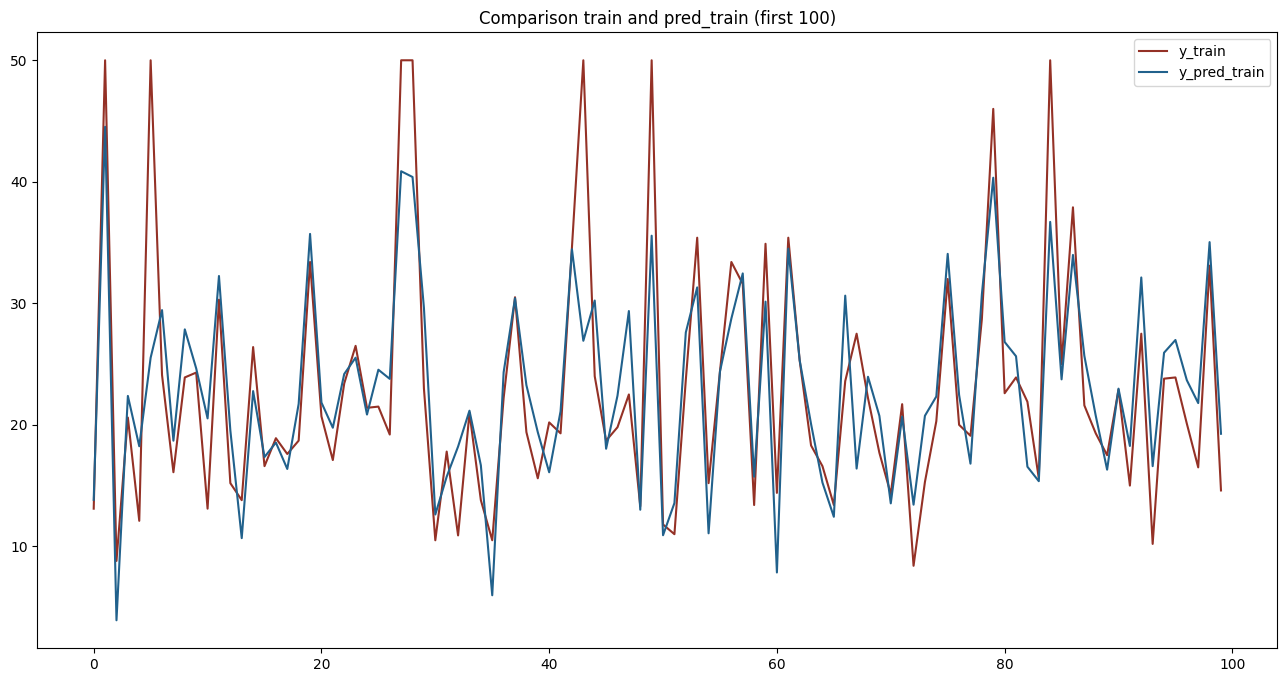

In [97]:
plt.figure(figsize=(16, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.lineplot(data=predict_train_data[:100], dashes=False, palette=['#943126', '#21618c'])
plt.title('Comparison train and pred_train (first 100)')
plt.show()

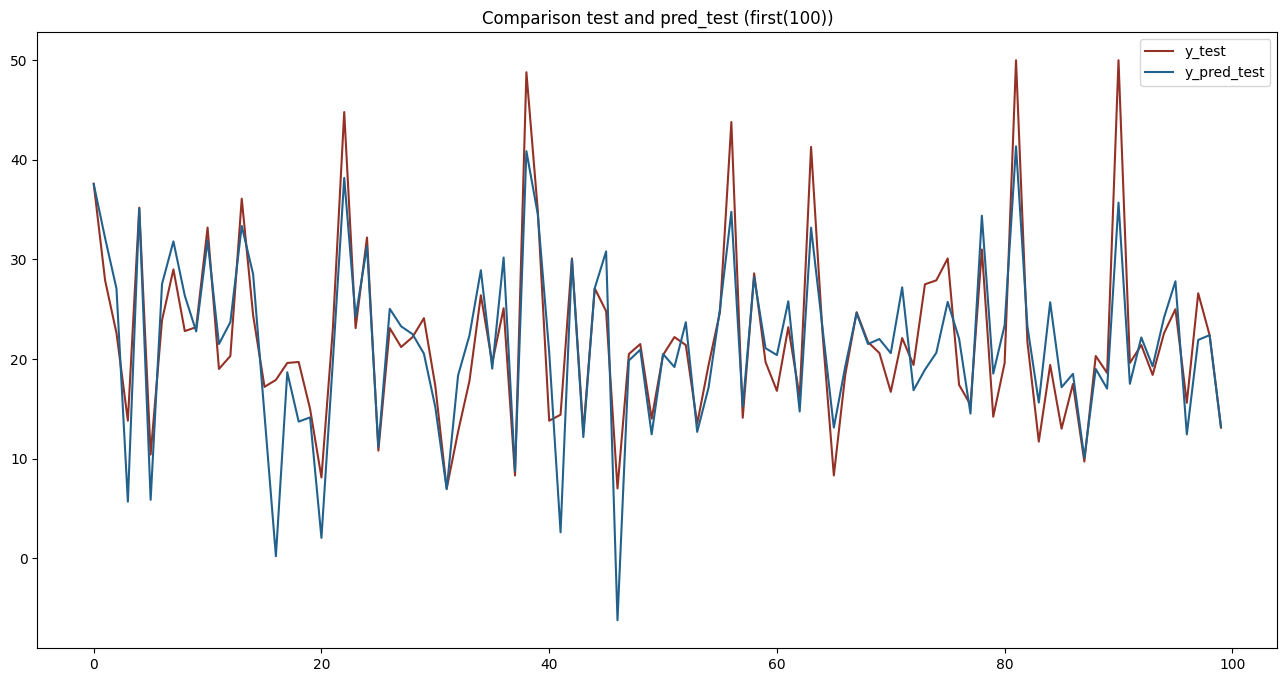

In [98]:
plt.figure(figsize=(16, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.lineplot(data=predict_test_data[:100], dashes=False, palette=['#943126', '#21618c'])
plt.title('Comparison test and pred_test (first(100))')
plt.show()